# Magnetization in a soft magnet Landau–Lifshitz–Gilbert equation

In soft ferromagnetic materials, the saturation magentization $\textit{M}_s$ varies in direction along the sample but not in magnitude i.e. 

\begin{equation}
|\mathbf{M}(\mathbf{\mathbf{r}})| = M_s
\end{equation}

Imagine that we look at a tiny little part of a soft ferromagnet (as tiny as 5.7 nm for [Permalloy](https://en.wikipedia.org/wiki/Permalloy)). In this short range we are sure that the direction of the magnetization does not change much thanks to the exchange interaction, an interaction of quantum effect that tends to keep neighboring quantum spins alligned. Then, the magnetization direction of this little part of the material can be described microscopically by the [Landau–Lifshitz–Gilbert](http://dx.doi.org/10.1063/1.4932090) (LLG) equation:

\begin{equation}
(1+\alpha^2)\frac{d\mathbf{m}}{d\tau} = -\mathbf{m} \times \mathbf{h}_{eff} - \alpha \mathbf{m} \times \left(\mathbf{m} \times \mathbf{h}_{eff} \right)
\end{equation}

where $\mathbf{m}$ is the magnetization vector and $\mathbf{h}_{eff}$ the effective field, both normalized to the saturation magnetization $M_s$. Here $\tau$ is the time normalized to $t_0 = 1/\left(\gamma M_s\right)$, $\gamma$ is is the gyromagnetic factor and $\alpha = \lambda M_s/\gamma$ being $\lambda$ the damping constant and $\alpha$ the Gilbert damping.

\begin{equation}
\tau = \frac{t}{t_0} = t\gamma M_s
\end{equation}

Units are:

* $\left[\gamma\right] = m A^{-1}s^{-1}$
* $\left[t_0\right] = s$
* $\left[\alpha\right]$ unitless

Typical values for Permalloy (a common widely used soft ferromagnet) are $\gamma = 2.211 \times 10^{5} m A^{-1} s^{-1}$, $\alpha = 0.02$ and $M_{s} = 8 \times 10^{5} A m^{-1}$. The characteristic time of the system is $t_0$ is thus $5.62$ps, this indicates the time range over which the magnetization changes.

Let's investigate the equation:

<img src="LLG1.PNG" width="400" height="400" align="center"/>

In the above image we plotted shcematically the vectors of the LLG equation.

* The effective field $\mathbf{h}_{eff}$ contains the terms of the external applied magnetic field and other magnetic fields coming from quantum or magnetostatic interactions.

* The first term in the right hand side of the equation is perpendicular to both, $\mathbf{m}$ and $\mathbf{h}_{eff}$. This is called the *precession term* and makes $\textbf{m}$ to rotate over $\mathbf{h}_{eff}$ over time. This term does not make changes on the energy of the system since it only makes $\mathbf{m}$ to do a precesion over $\mathbf{h}_{eff}$ making no change on the angle between both. 

* The second term of the equation is called the *damping term*. This term tends to align $\textbf{m}$ to $\textbf{h}_{eff}$. Now, since according to this term the angle of $\mathbf{h}_{eff}$ changes with $\mathbf{m}$ it does dissipate energy.

The system is at a local energy minimum when $\textbf{h}_{eff}$ is parallel to $\textbf{m}$. That is, when both the effective field and the magnetisation point the same direction or, equivalently $d\mathbf{m}/dt = 0$.

<img src="LLG2.PNG" width="300" height="300" align="center"/>

Here's another way to see the evolution of the magnetization (considering that $\mathbf{H}_{eff}$ does not vary over time either magnitude or direction). The spiral indicates the path of the tip of the magnetization seen from the top. If only the precesion term was present the magnetization tip would draw a perfect circle and the energy of the system would be constant. The damping term as explained tends to make the magnetization pointing the effective field.  

In [1]:
import numpy as np

alpha = np.float128(0.2)
Ms = np.float128(8.0e5)
gamma = np.float128(2.211e5)
t0 = 1/(Ms*gamma)

h = np.array([0,0,1],dtype=np.float128) #applied field in the z direction
m = np.array([np.sqrt(3)/2,0,1/2],dtype=np.float128) #unit magnetization in x-z plane, with angle 60deg w.r.t z dir

we have assumed in this case the parameters corresponding to Permalloy. Saturation magnetization $M_s$ is $8\times 10^{5} A/m$, the gyromagnetic ratio $\gamma = 2.211 \times 10^{5} m A^{-1}s^{-1}$ and $\alpha$ the damping constant as 0.2. In our example the initial magnetization has an angle of 60deg with respect to the z direction being in the x-z plane and the applied field is of magnitude $M_s$ pointing the positive $z$ direction.

In the following we define a function that ingtegrates LLG equation using Euler integration $O(\Delta t^2)$

In [2]:
def MagnetizationEvolutionEuler(h,m,alpha = alpha,t0 = t0, tf = 100, timestep = 1/100):
    '''
    Solve LLG equation over time integrating Euler
    inputs:
    ==========
        * h, normalized (to Ms) static applied field vector
        * m, unitary vector with initial magnetization direction
        * alpha, the damping constant (unitless)
        * t0 = 1/(gamma*Ms) where gamma is gyromagnetic ratio. This is characteristic time scale in seconds
        * timestep: number of integration steps over t0
    outputs:
    ==========
        * (t,mfx,mfy,mfz) 
        
        * t is the timestep
        * mfx is the x projection of m unitary vector
        * mfy is the y ...
        * mfz is the z ...
    '''
    h_ = np.copy(h)
    m_ = np.copy(m)
    t = np.float128(0)
    
    t_arr = np.array([],np.float128)
    m_arr = list()
    
    #print("Time evolution from 0ns to {}ns".format(tf*t0*np.float128(1e9)))
    while t < tf:
        t+=timestep
        u = -(np.cross(m_,h_) + alpha*np.cross(m_,np.cross(m_,h_)))/(1+np.power(alpha,2.0))
        u *= timestep
        m_ += u
        m_ = m_/np.linalg.norm(m_)
        
        t_arr = np.append(t_arr,t)
        m_arr.append(m_)
    
    return (t_arr,m_arr)

def CartesianToPolar(m0,m1):
    '''
    Inputs:
    ========
    * two components of a unitary vector
    
    Outputs:
    ========
    * r radius of the vector in polar coords
    * theta angle of the vector in polar coords
    '''
    r = np.array([],dtype=np.float128)
    theta = np.array([],dtype=np.float128)
    
    for c in zip(m0,m1):
        r = np.append(r,np.sqrt(np.power(c[0],2.0)+np.power(c[1],2.0)))
        theta = np.append(theta,np.arctan2(c[1],c[0]))
        
    return r,theta

## Undamped spin precesion

Let's do a calculation of precesion only ($\alpha = 0$). This will make $m$

In [3]:
t,m_ = MagnetizationEvolutionEuler(h,m,alpha=0.0,tf=30)

<IPython.core.display.Javascript object>


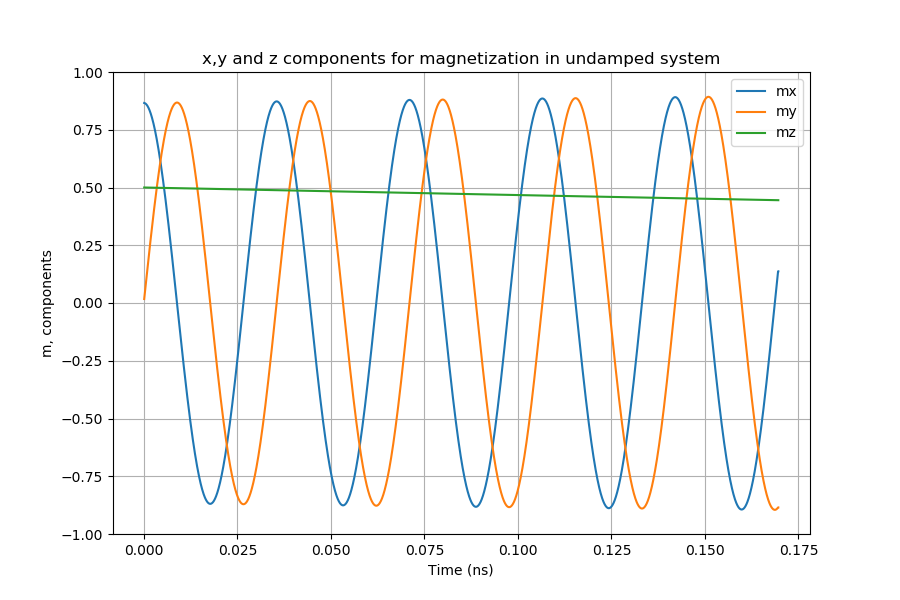

In [4]:
import matplotlib.pyplot as plt
%matplotlib notebook

mx = [m[0] for m in m_]
my = [m[1] for m in m_]
mz = [m[2] for m in m_]

fig = plt.figure(figsize=(9,6))
plt.plot(t*t0*np.float128(1e9),mx,label="mx")
plt.plot(t*t0*np.float128(1e9),my,label="my")
plt.plot(t*t0*np.float128(1e9),mz,label="mz")

plt.title("x,y and z components for magnetization in undamped system")
plt.xlabel("Time (ns)")
plt.ylabel("m, components")
plt.ylim(-1,1)

plt.legend()
plt.grid()


In this case since $\alpha = 0$ the magnetization should precess along the $z$ direction all the time. This means, $m_z$ is constant and $m_x$ and $m_y$ change its direction over time. This is the case! However we see a small decrement of the $m_z$ component due to computational error (we are using Euler integration).

<IPython.core.display.Javascript object>


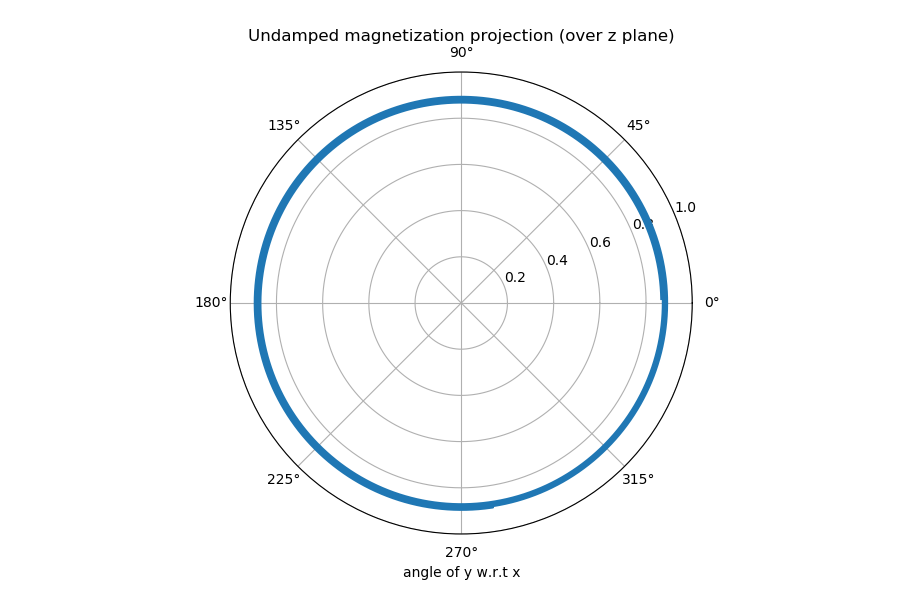

Text(0.5,1.05,'Undamped magnetization projection (over z plane)')

In [5]:
r,theta = CartesianToPolar(mx,my)

fig = plt.figure(figsize=(9,6))
plt.polar(theta, r)

plt.xlim(0,2*np.pi)
plt.xlabel("angle of y w.r.t x")

plt.ylim(0,1)
plt.title("Undamped magnetization projection (over z plane)")

This is a projection of $m_x$ and $m_y$ over the $z$ plane. As you can see, the tip of the magnetization vector precess all the time around the $z$ axis. Let's do the same plot but with the components $m_x$ and $m_z$

<IPython.core.display.Javascript object>


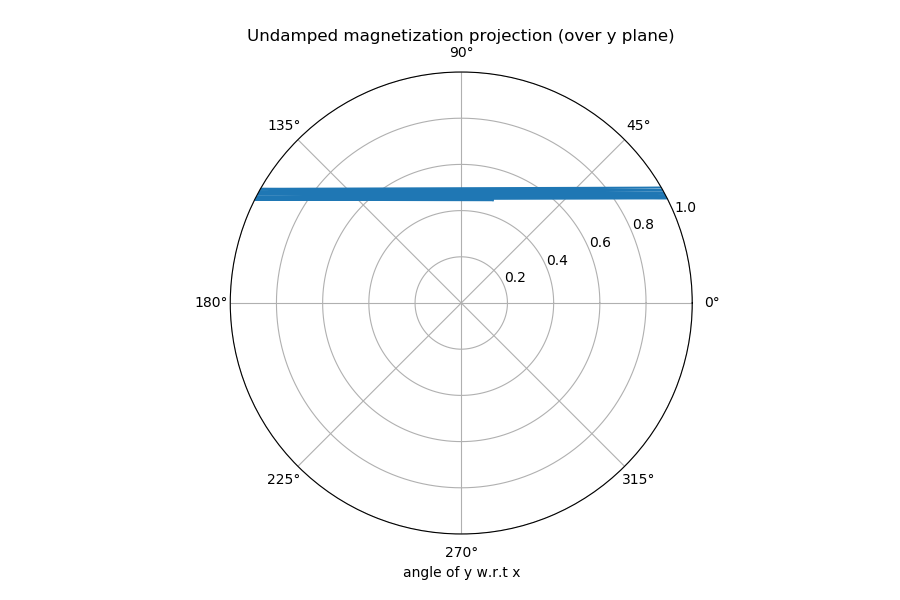

Text(0.5,1.05,'Undamped magnetization projection (over y plane)')

In [6]:
r,theta = CartesianToPolar(mx,mz)

fig = plt.figure(figsize=(9,6))
plt.polar(theta, r)

plt.xlim(0,2*np.pi)
plt.xlabel("angle of y w.r.t x")

plt.ylim(0,1)
plt.title("Undamped magnetization projection (over y plane)")

It keeps oscillating over the $x-y$ plane but $z$ component is decreasing (this shouldn't be). We must decrease the error in the integration, we'll do it later by implementing Runge Kutta of order 4.

## Damped spin precesion

Now we will add the damping term by setting $\alpha = 0.2$ (typical value for Permalloy). The damping term adds an energy dissipation thus making the system reach a local minimum of the energy (actually in this particular case is a global minimum).

<IPython.core.display.Javascript object>


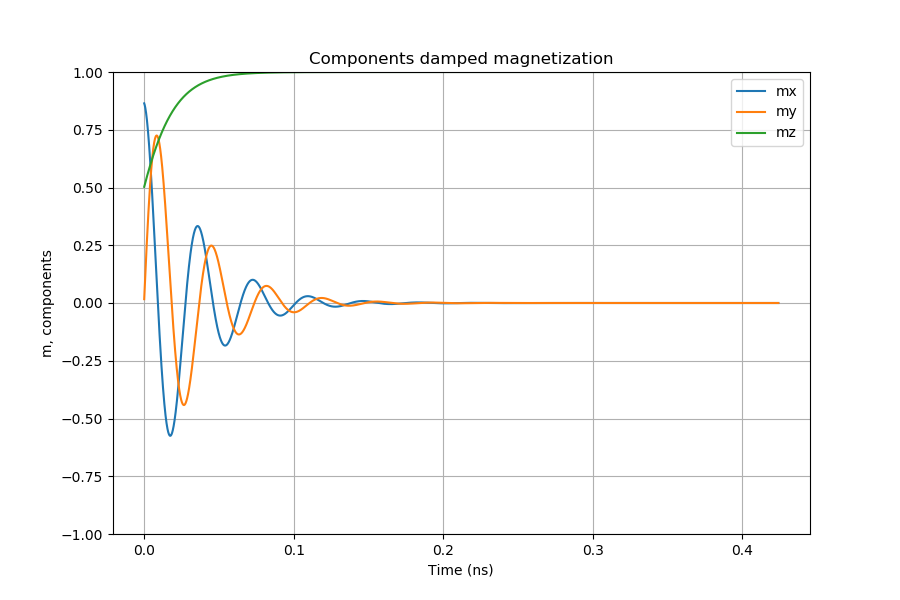

In [7]:
t,m_ = MagnetizationEvolutionEuler(h,m,alpha=0.2,tf=75)

mx = [m[0] for m in m_]
my = [m[1] for m in m_]
mz = [m[2] for m in m_]

fig = plt.figure(figsize=(9,6))
plt.plot(t*t0*np.float128(1e9),mx,label="mx")
plt.plot(t*t0*np.float128(1e9),my,label="my")
plt.plot(t*t0*np.float128(1e9),mz,label="mz")

plt.xlabel("Time (ns)")
plt.ylabel("m, components")
plt.title("Components damped magnetization")
plt.ylim(-1,1)

plt.legend()
plt.grid()

The damping term makes the $z$ component of the magnetization to become parallel to the applied field, this way it minimizes the energy of the system. The magnetization keeps oscillating on the $x-y$ plane as it aproaches to the $z$ axis, let's see this by looking at the projection on the $x-y$ plane

<IPython.core.display.Javascript object>


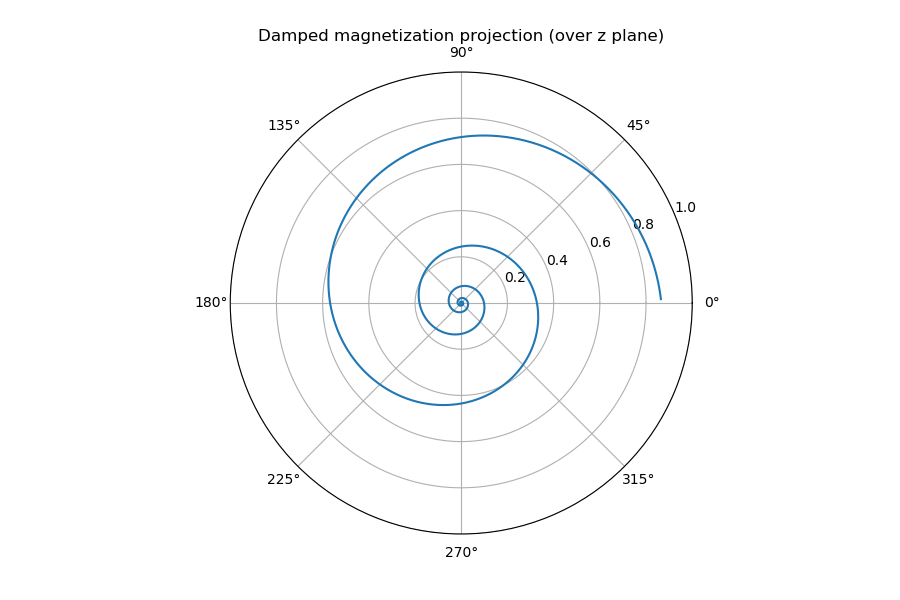

Text(0.5,1.05,'Damped magnetization projection (over z plane)')

In [8]:
r,theta = CartesianToPolar(mx,my)

fig = plt.figure(figsize=(9,6))
plt.polar(theta, r)

plt.xlim(0,2*np.pi)
plt.ylim(0,1)
plt.title("Damped magnetization projection (over z plane)")

The tip of the magnetization forms a nice spiral to finish pointing the $z$ direction. As you can imagine, the larger the value of $\alpha$ the faster the magnetization goes to point the applied field direction.

<IPython.core.display.Javascript object>


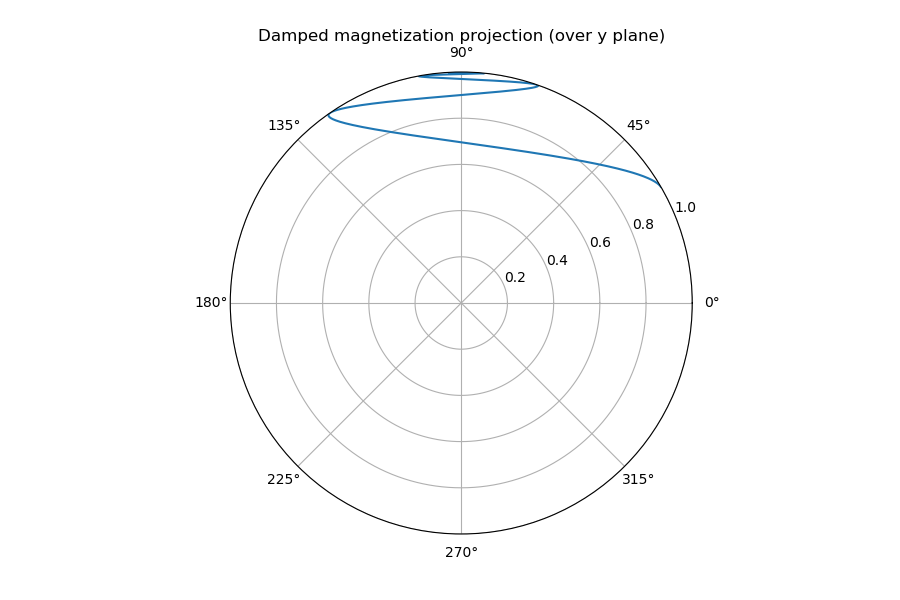

Text(0.5,1.05,'Damped magnetization projection (over y plane)')

In [9]:
r,theta = CartesianToPolar(mx,mz)

fig = plt.figure(figsize=(9,6))
plt.polar(theta, r)

plt.xlim(0,2*np.pi)
plt.ylim(0,1)
plt.title("Damped magnetization projection (over y plane)")

Here is the projection over the y plane ($m_x$ and $m_z$ components), we can see how the tip of the magnetization approaches to the $z$ direction.

## Integrating LLG over time with fourth-order Runge Kutta.

We've seen that we lack numercial precission, this is why here we implement a much more robust integration scheme, the Runge Kutta of order 4 leaves an error of $O(\Delta t^5)$. From the book numerical recipes we define $k_1$, $k_2$, $k_3$ and $k_4$ (adapted to our particular problem)

\begin{eqnarray}
k_1 &=& f(t,\mathbf{h},\mathbf{m},\alpha)\cdot \Delta t\\
k_2 &=& f(t + \Delta t/2,\mathbf{h},\mathbf{m}+\mathbf{k}_1/2,\alpha)\Delta t \\
k_3 &=& f(t + \Delta t/2,\mathbf{h},\mathbf{m}+\mathbf{k}_2/2,\alpha) \Delta t\\
k_4 &=& f(t + \Delta t,\mathbf{h},\mathbf{m}+\mathbf{k}_3,\alpha) \Delta t
\end{eqnarray}

being 

\begin{equation}
f(t,\mathbf{h},\mathbf{m},\alpha) = f(\mathbf{h},\mathbf{m},\alpha) = \frac{1}{1+\alpha^2}\left[-\mathbf{m} \times \mathbf{h}_{eff} - \alpha \mathbf{m} \times \left(\mathbf{m} \times \mathbf{h}_{eff} \right)\right]
\end{equation}

and finally

\begin{equation}
\mathbf{m}_{t+1} = \mathbf{m}_t +\frac{k_1}{6}+\frac{k_2}{3}+\frac{k_3}{3}+\frac{k_4}{6}
\end{equation}

In [10]:
def f(h_,m_,alpha = alpha):
    return -(np.cross(m_,h_) + alpha*np.cross(m_,np.cross(m_,h_)))/(1+np.power(alpha,2.0))

def MagnetizationEvolutionRK4(h,m,alpha = alpha,t0 = t0, tf = 100, timestep = 1/100):
    '''
    Solve LLG equation over time integrating fourth order Runge Kutta
    inputs:
    ==========
        * h, normalized (to Ms) static applied field vector
        * m, unitary vector with initial magnetization direction
        * alpha, the damping constant (unitless)
        * t0 = 1/(gamma*Ms) where gamma is gyromagnetic ratio. This is characteristic time scale in seconds
        * timestep: number of integration steps over t0
    outputs:
    ==========
        * (t,mfx,mfy,mfz) 
        
        * t is the timestep
        * mfx is the x projection of m unitary vector
        * mfy is the y ...
        * mfz is the z ...
    '''
    h_ = np.copy(h)
    m_ = np.copy(m)
    t = np.float128(0)
    
    t_arr = np.array([],np.float128)
    m_arr = list()
    
    #print("Time evolution from 0ns to {}ns".format(tf*t0*np.float128(1e9)))
    while t < tf:
        t+=timestep
        k1 = f(h_,m_,alpha)*timestep
        k2 = f(h_,m_ + k1/2.0,alpha)*timestep
        k3 = f(h_,m_ + k2/2.0,alpha)*timestep
        k4 = f(h_,m_ + k3,alpha)*timestep
        
        m_ += k1/6.0 + k2/3.0 + k3/3.0 +k4/6.0
        m_ = m_/np.linalg.norm(m_)
        
        t_arr = np.append(t_arr,t)
        m_arr.append(m_)
    
    return (t_arr,m_arr)

Let's try the undamped equation to test the runge kutta 4 integration

<IPython.core.display.Javascript object>


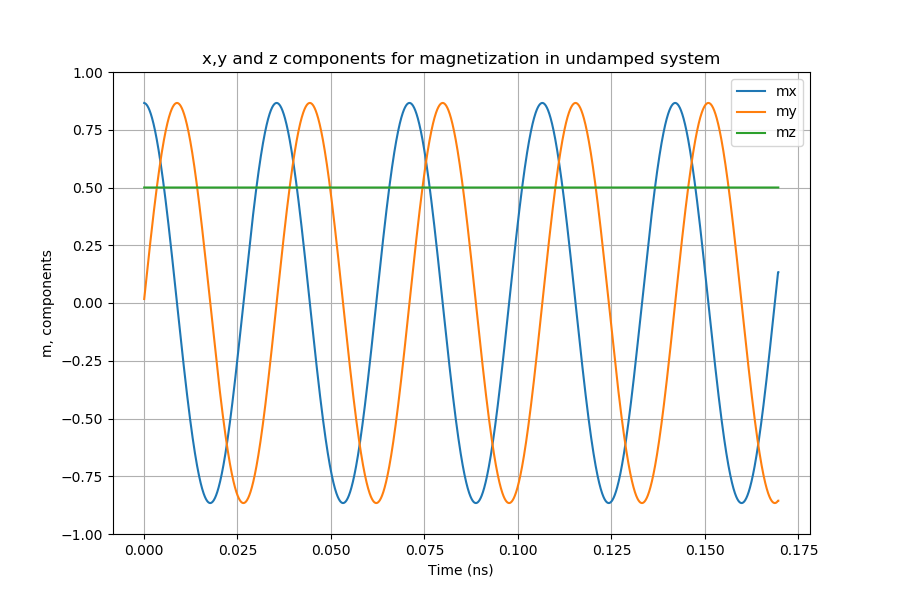

In [11]:
t,m_ = MagnetizationEvolutionRK4(h,m,alpha=0.0,tf=30)

mx = [m[0] for m in m_]
my = [m[1] for m in m_]
mz = [m[2] for m in m_]

fig = plt.figure(figsize=(9,6))
plt.plot(t*t0*np.float128(1e9),mx,label="mx")
plt.plot(t*t0*np.float128(1e9),my,label="my")
plt.plot(t*t0*np.float128(1e9),mz,label="mz")

plt.title("x,y and z components for magnetization in undamped system")
plt.xlabel("Time (ns)")
plt.ylabel("m, components")
plt.ylim(-1,1)

plt.legend()
plt.grid()

Error is very small, look at the z component of the magenization!. Just to see numerical error look at the 

In [12]:
mz[-10:]

[0.500000000007789019,
 0.50000000000779162314,
 0.50000000000779422729,
 0.50000000000779683143,
 0.50000000000779943558,
 0.50000000000780203972,
 0.50000000000780464387,
 0.50000000000780724801,
 0.50000000000780985216,
 0.5000000000078124563]

and a plot of the $m_x$ and $m_z$ components. As you see again, error on the $z$ direction is much less now.

<IPython.core.display.Javascript object>


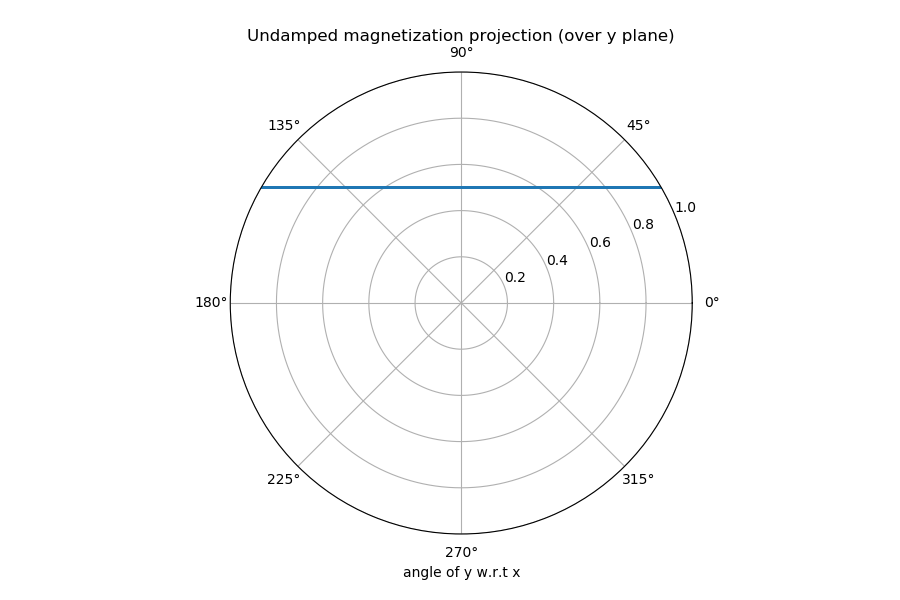

Text(0.5,1.05,'Undamped magnetization projection (over y plane)')

In [13]:
r,theta = CartesianToPolar(mx,mz)

fig = plt.figure(figsize=(9,6))
plt.polar(theta, r)

plt.xlim(0,2*np.pi)
plt.xlabel("angle of y w.r.t x")

plt.ylim(0,1)
plt.title("Undamped magnetization projection (over y plane)")

## Conclusions

We've understood how damping and precession terms work in LLG equation. We first deleted the damping term making the magnetization precess around the applied field direction, we saw there was a lot of error there (the projection of magnetization over the applied field direction was varying a little bit) using Euler numerical integration. Later on we included the damping term to see the effect of the magnetization aproaching to the applied field direction. Finally we improved the integration scheme using runge kutta of order 4 and demonstrated that the error is reduced in the case without damping.

In the next notebook we'll analyze the behavior on a time varying applied field.